In [216]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import requests
import matplotlib.pyplot as mp
import datetime


bitcoin = requests.get("https://api.coingecko.com/api/v3/coins/bitcoin/history?date=01-01-2021").text
dogecoin = requests.get("https://api.coingecko.com/api/v3/coins/dogecoin/market_chart/range?vs_currency=usd&from=1609477200&to=1655001183").text
ethereum = requests.get("https://api.coingecko.com/api/v3/coins/ethereum/market_chart/range?vs_currency=usd&from=1609477200&to=1655001183").text


In [49]:
#bitcoin
df_coinbase = pd.read_json('https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from=1609477200&to=1655001183')
#for prices
df_coinbase['prices'] = df_coinbase['prices'].astype('string')
df_coinbase[['unix', 'price']] = df_coinbase['prices'].str.split(pat = ',', expand = True)
df_coinbase['prices'] = df_coinbase['prices'].astype('string')
df_coinbase[['unix', 'price']] = df_coinbase['prices'].str.split(pat = ',', expand = True)
df_coinbase['unix']=df_coinbase['unix'].str[1:]
df_coinbase['date']=pd.to_datetime(df_coinbase['unix'].astype(int), unit = 'ms', origin = 'unix')
df_coinbase['price']=df_coinbase['price'].str[:-1]
df_coinbase['price'] = df_coinbase['price'].astype(float)

# for market cap
df_coinbase['market_caps'] = df_coinbase['market_caps'].astype('string')
df_coinbase[['unix2', 'market_cap']] = df_coinbase['market_caps'].str.split(pat = ',', expand = True)
df_coinbase['market_cap'] = df_coinbase['market_cap'].astype('string')
#df_coinbase[['unix', 'price']] = df_coinbase['prices'].str.split(pat = ',', expand = True)
#df_coinbase['unix']=df_coinbase['unix'].str[1:]
#df_coinbase['date']=pd.to_datetime(df['unix'].astype(int), unit = 'ms', origin = 'unix')
df_coinbase['market_cap']=df_coinbase['market_cap'].str[:-1]
df_coinbase['market_cap'] = df_coinbase['market_cap'].astype(float)

#total volume
df_coinbase['total_volumes'] = df_coinbase['total_volumes'].astype('string')
df_coinbase[['unix3', 'total_volume']] = df_coinbase['total_volumes'].str.split(pat = ',', expand = True)
df_coinbase['total_volume'] = df_coinbase['total_volume'].astype('string')
df_coinbase['total_volume']=df_coinbase['total_volume'].str[:-1]
df_coinbase['total_volume'] = df_coinbase['total_volume'].astype(float)

#df_coinbase = df_coinbase['date', 'price', 'market_cap', 'total_volume']

    df_coinbase = df_coinbase.iloc[:, [4,5,7,9]]

df_coinbase.rename(columns={"price": "bitcoin_price", "market_cap": "bitcoin_market_cap", "total_volume":"bitcoin_total_volume"}, inplace=True)

df_coinbase.head()


,bitcoin_price,date,bitcoin_market_cap,bitcoin_total_volume
0,29352.126792,2021-01-02,5.455933e+11,3.408972e+10
1,32163.824935,2021-01-03,5.978877e+11,5.727344e+10
2,33008.226203,2021-01-04,6.136169e+11,1.788941e+11
3,31515.575967,2021-01-05,5.857263e+11,7.465717e+10
4,34082.206049,2021-01-06,6.336517e+11,6.742050e+10


In [55]:
#doge_coin
df_dogecoin= pd.read_json('https://api.coingecko.com/api/v3/coins/dogecoin/market_chart/range?vs_currency=usd&from=1609477200&to=1655001183')

#for prices
df_dogecoin['prices'] = df_dogecoin['prices'].astype('string')
df_dogecoin[['unix', 'price']] = df_dogecoin['prices'].str.split(pat = ',', expand = True)
df_dogecoin['prices'] = df_dogecoin['prices'].astype('string')
df_dogecoin[['unix', 'price']] = df_dogecoin['prices'].str.split(pat = ',', expand = True)
df_dogecoin['unix']=df_dogecoin['unix'].str[1:]
df_dogecoin['date']=pd.to_datetime(df_dogecoin['unix'].astype(int), unit = 'ms', origin = 'unix')
df_dogecoin['price']=df_dogecoin['price'].str[:-1]
df_dogecoin['price'] = df_dogecoin['price'].astype(float)

# for market cap
df_dogecoin['market_caps'] = df_dogecoin['market_caps'].astype('string')
df_dogecoin[['unix2', 'market_cap']] = df_dogecoin['market_caps'].str.split(pat = ',', expand = True)
df_dogecoin['market_cap'] = df_dogecoin['market_cap'].astype('string')
#df_coinbase[['unix', 'price']] = df_coinbase['prices'].str.split(pat = ',', expand = True)
#df_coinbase['unix']=df_coinbase['unix'].str[1:]
#df_coinbase['date']=pd.to_datetime(df['unix'].astype(int), unit = 'ms', origin = 'unix')
df_dogecoin['market_cap']=df_dogecoin['market_cap'].str[:-1]
df_dogecoin['market_cap'] = df_dogecoin['market_cap'].astype(float)

#total volume
df_dogecoin['total_volumes'] = df_dogecoin['total_volumes'].astype('string')
df_dogecoin[['unix3', 'total_volume']] = df_dogecoin['total_volumes'].str.split(pat = ',', expand = True)
df_dogecoin['total_volume'] = df_dogecoin['total_volume'].astype('string')
df_dogecoin['total_volume']=df_dogecoin['total_volume'].str[:-1]
df_dogecoin['total_volume'] = df_dogecoin['total_volume'].astype(float)

#df_coinbase = df_coinbase['date', 'price', 'market_cap', 'total_volume']

df_dogecoin = df_dogecoin.iloc[:, [4,5,7,9]]

df_dogecoin.rename(columns={"price": "dogecoin_price", "market_cap": "dogecoin_market_cap", "total_volume":"dogecoin_total_volume"}, inplace=True)


df_dogecoin.head()



,dogecoin_price,date,dogecoin_market_cap,dogecoin_total_volume
0,0.005538,2021-01-02,7.075762e+08,2.446071e+08
1,0.010603,2021-01-03,1.354820e+09,3.117161e+09
2,0.010087,2021-01-04,1.288355e+09,2.306839e+09
3,0.009592,2021-01-05,1.226307e+09,1.238833e+09
4,0.009841,2021-01-06,1.257877e+09,6.430974e+08


In [57]:
#Etherium
df_ethereum= pd.read_json(ethereum)

df_ethereum= pd.read_json('https://api.coingecko.com/api/v3/coins/ethereum/market_chart/range?vs_currency=usd&from=1609477200&to=1655001183')

#for prices
df_ethereum['prices'] = df_ethereum['prices'].astype('string')
df_ethereum[['unix', 'price']] = df_ethereum['prices'].str.split(pat = ',', expand = True)
df_ethereum['prices'] = df_ethereum['prices'].astype('string')
df_ethereum[['unix', 'price']] = df_ethereum['prices'].str.split(pat = ',', expand = True)
df_ethereum['unix']=df_ethereum['unix'].str[1:]
df_ethereum['date']=pd.to_datetime(df_ethereum['unix'].astype(int), unit = 'ms', origin = 'unix')
df_ethereum['price']=df_ethereum['price'].str[:-1]
df_ethereum['price'] = df_ethereum['price'].astype(float)

# for market cap
df_ethereum['market_caps'] = df_ethereum['market_caps'].astype('string')
df_ethereum[['unix2', 'market_cap']] = df_ethereum['market_caps'].str.split(pat = ',', expand = True)
df_ethereum['market_cap'] = df_ethereum['market_cap'].astype('string')
#df_coinbase[['unix', 'price']] = df_coinbase['prices'].str.split(pat = ',', expand = True)
#df_coinbase['unix']=df_coinbase['unix'].str[1:]
#df_coinbase['date']=pd.to_datetime(df['unix'].astype(int), unit = 'ms', origin = 'unix')
df_ethereum['market_cap']=df_ethereum['market_cap'].str[:-1]
df_ethereum['market_cap'] = df_ethereum['market_cap'].astype(float)

#total volume
df_ethereum['total_volumes'] = df_ethereum['total_volumes'].astype('string')
df_ethereum[['unix3', 'total_volume']] = df_ethereum['total_volumes'].str.split(pat = ',', expand = True)
df_ethereum['total_volume'] = df_ethereum['total_volume'].astype('string')
df_ethereum['total_volume']=df_ethereum['total_volume'].str[:-1]
df_ethereum['total_volume'] = df_ethereum['total_volume'].astype(float)

#df_coinbase = df_coinbase['date', 'price', 'market_cap', 'total_volume']

df_ethereum = df_ethereum.iloc[:, [4,5,7,9]]

df_ethereum.rename(columns={"price": "ethereum_price", "market_cap": "ethereum_market_cap", "total_volume":"ethereum_total_volume"}, inplace=True)

df_ethereum.head()



,ethereum_price,date,ethereum_market_cap,ethereum_total_volume
0,730.147340,2021-01-02,8.329408e+10,1.384318e+10
1,777.696065,2021-01-03,8.859535e+10,2.044366e+10
2,967.000597,2021-01-04,1.125254e+11,1.409065e+11
3,1025.654768,2021-01-05,1.166932e+11,6.228514e+10
4,1103.358252,2021-01-06,1.251129e+11,4.714825e+10


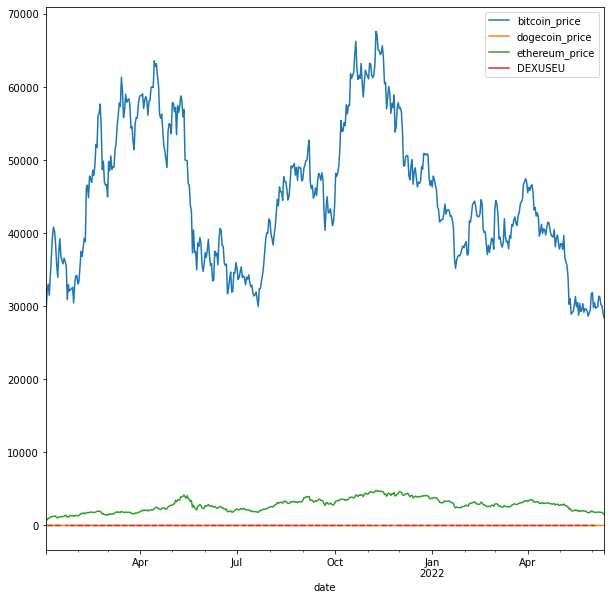

In [58]:
#exchange data
euro_usd_exchange = pd.read_csv('DEXUSEU.csv')
#merge bitcoin and dogecoin
df2=df_coinbase.merge(df_dogecoin, on='date', how='left')
#df2.head()
#merge df2 with etherieum
df3=df2.merge(df_ethereum, on='date', how='left')
#df3.head()
#merge df3 with exchange data
euro_usd_exchange.rename(columns={"DATE": "date"}, inplace=True)
euro_usd_exchange["date"] =  pd.to_datetime(euro_usd_exchange["date"], format="%Y/%m/%d")
finaldf = df3.merge(euro_usd_exchange, on='date', how='left')
finaldf['DEXUSEU']=pd.to_numeric(finaldf['DEXUSEU'], errors='coerce')
#finaldf.info()
#visualization
finaldf.plot(x="date", y=["bitcoin_price", "dogecoin_price", "ethereum_price", "DEXUSEU"],
        kind="line", figsize=(10, 10))

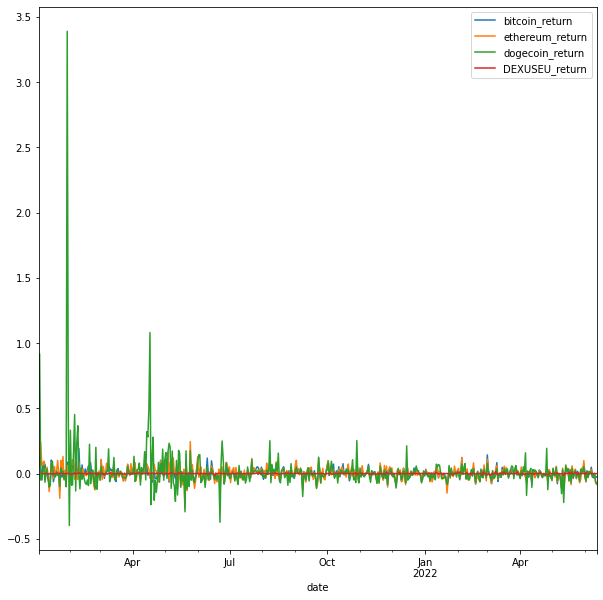

In [59]:
#For all currencies, calculate their daily returns (given by: rett = Pt- Pt-1/Pt-1), and then plot them.
finaldf['bitcoin_return'] = finaldf['bitcoin_price'].pct_change(1)
finaldf['ethereum_return'] = finaldf['ethereum_price'].pct_change(1)
finaldf['dogecoin_return'] = finaldf['dogecoin_price'].pct_change(1)
finaldf['DEXUSEU_return'] = finaldf['DEXUSEU'].pct_change(1)
#finaldf.head()

finaldf.plot(x="date", y=["bitcoin_return", "ethereum_return", "dogecoin_return", "DEXUSEU_return"],
        kind="line", figsize=(10, 10))


,bitcoin_price,date,bitcoin_market_cap,bitcoin_total_volume,dogecoin_price,dogecoin_market_cap,dogecoin_total_volume,ethereum_price,ethereum_market_cap,ethereum_total_volume,DEXUSEU,bitcoin_return,ethereum_return,dogecoin_return,DEXUSEU_return,bitcoin_doge_corr,bitcoin_eth_corr,doge_eth_corr
0,29352.126792,2021-01-02,5.455933e+11,3.408972e+10,0.005538,7.075762e+08,2.446071e+08,730.147340,8.329408e+10,1.384318e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32163.824935,2021-01-03,5.978877e+11,5.727344e+10,0.010603,1.354820e+09,3.117161e+09,777.696065,8.859535e+10,2.044366e+10,NaN,0.095792,0.065122,0.914510,NaN,NaN,NaN,NaN
2,33008.226203,2021-01-04,6.136169e+11,1.788941e+11,0.010087,1.288355e+09,2.306839e+09,967.000597,1.125254e+11,1.409065e+11,1.2254,0.026253,0.243417,-0.048702,NaN,NaN,NaN,NaN
3,31515.575967,2021-01-05,5.857263e+11,7.465717e+10,0.009592,1.226307e+09,1.238833e+09,1025.654768,1.166932e+11,6.228514e+10,1.2295,-0.045221,0.060656,-0.049068,0.003346,NaN,NaN,NaN
4,34082.206049,2021-01-06,6.336517e+11,6.742050e+10,0.009841,1.257877e+09,6.430974e+08,1103.358252,1.251129e+11,4.714825e+10,1.2290,0.081440,0.075760,0.026004,-0.000407,NaN,NaN,NaN


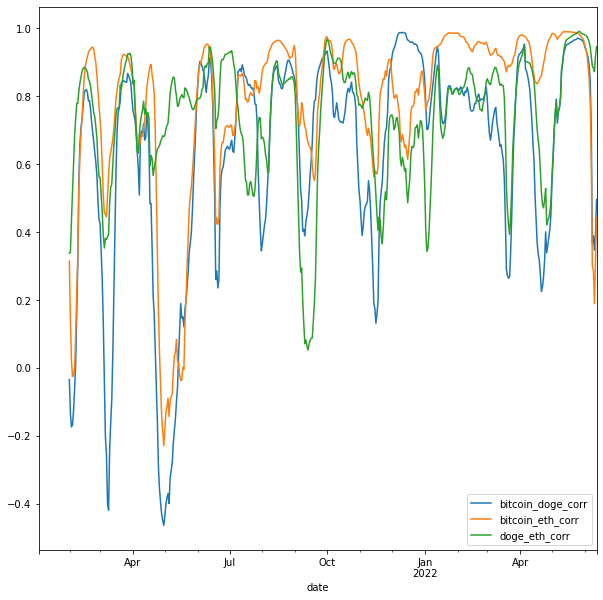

In [60]:
#rolling 30 day pair correlation
finaldf['bitcoin_doge_corr']=finaldf['bitcoin_price'].rolling(30).corr(finaldf['dogecoin_price'])
finaldf['bitcoin_eth_corr']=finaldf['bitcoin_price'].rolling(30).corr(finaldf['ethereum_price'])
finaldf['doge_eth_corr']=finaldf['dogecoin_price'].rolling(30).corr(finaldf['ethereum_price'])

finaldf.plot(x="date", y=["bitcoin_doge_corr", "bitcoin_eth_corr", "doge_eth_corr"],
        kind="line", figsize=(10, 10))

finaldf.head()

,bitcoin_price,date,bitcoin_market_cap,bitcoin_total_volume,dogecoin_price,dogecoin_market_cap,dogecoin_total_volume,ethereum_price,ethereum_market_cap,ethereum_total_volume,...,ethereum_return,dogecoin_return,DEXUSEU_return,bitcoin_doge_corr,bitcoin_eth_corr,doge_eth_corr,bitcoin_std,doge_std,eth_std,eur_std
0,29352.126792,2021-01-02,5.455933e+11,3.408972e+10,0.005538,7.075762e+08,2.446071e+08,730.147340,8.329408e+10,1.384318e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32163.824935,2021-01-03,5.978877e+11,5.727344e+10,0.010603,1.354820e+09,3.117161e+09,777.696065,8.859535e+10,2.044366e+10,...,0.065122,0.914510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33008.226203,2021-01-04,6.136169e+11,1.788941e+11,0.010087,1.288355e+09,2.306839e+09,967.000597,1.125254e+11,1.409065e+11,...,0.243417,-0.048702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31515.575967,2021-01-05,5.857263e+11,7.465717e+10,0.009592,1.226307e+09,1.238833e+09,1025.654768,1.166932e+11,6.228514e+10,...,0.060656,-0.049068,0.003346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34082.206049,2021-01-06,6.336517e+11,6.742050e+10,0.009841,1.257877e+09,6.430974e+08,1103.358252,1.251129e+11,4.714825e+10,...,0.075760,0.026004,-0.000407,NaN,NaN,NaN,NaN,NaN,NaN,NaN


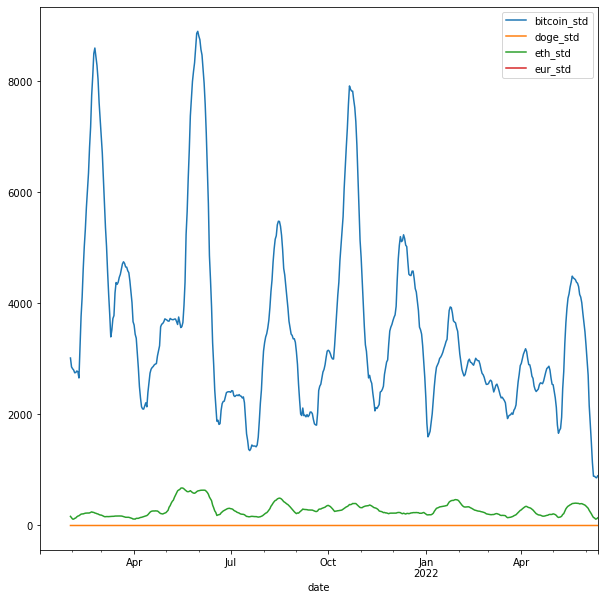

In [61]:
#rolling 30 day pair std
finaldf['bitcoin_std']=finaldf['bitcoin_price'].rolling(30).std()
finaldf['doge_std']=finaldf['dogecoin_price'].rolling(30).std()
finaldf['eth_std']=finaldf['ethereum_price'].rolling(30).std()
finaldf['eur_std']=finaldf['DEXUSEU'].rolling(30).std()

finaldf.plot(x="date", y=["bitcoin_std", "doge_std", "eth_std", "eur_std"],
        kind="line", figsize=(10, 10))

finaldf.head()

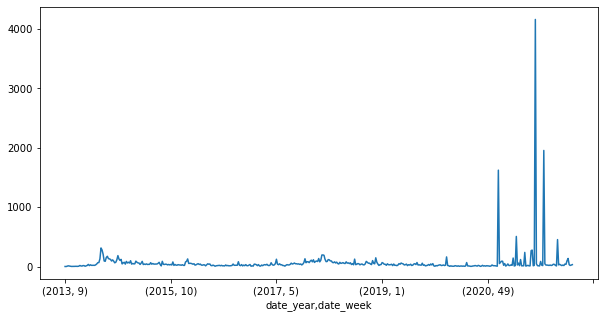

In [174]:
df_coinmap = pd.read_csv('download.csv') 
df_coinmap['Created_Date']=pd.to_datetime(df_coinmap['Created On'].astype(int), unit = 's')

df_coinmap = df_coinmap.iloc[:, [0,1,2,12]]

#df_coinmap.groupby([df_coinmap.index.Created_Date,'ID']).count().plot(kind='bar')

df_coinmap['date_week'] = df_coinmap['Created_Date'].apply(lambda x: x.isocalendar()[1])
df_coinmap['date_year'] = df_coinmap['Created_Date'].apply(lambda x: x.isocalendar()[0])
df_coinmap["Created_Date"] =  pd.to_datetime(df_coinmap["Created_Date"], format="%Y/%m/%d")
week_groups = df_coinmap.groupby([df_coinmap['date_year'],df_coinmap['date_week']]
                          )['ID'].count()
week_groups.plot(kind='line',figsize=(10,5),legend=None)



#df_coinmap.info()
#df_coinmap['date']=pd.to_datetime(df_coinmap['unix'].astype(int), unit = 'ms', origin = 'unix')

In [291]:
df_coinmap["Dates"] =  pd.to_datetime(df_coinmap["Created_Date"])

#df_coinmap['date2'] = df_coinmap['date'].dt()


df_coinmap['date'] = pd.to_datetime(df_coinmap['Dates']).dt.date

df_coinmap['date'] = pd.to_datetime(df_coinmap['date'])

df4=df_coinbase.merge(df_coinmap, on='date', how='left')
df4['ID'] = df4['ID'].astype('str')
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 11793
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bitcoin_price         11794 non-null  float64       
 1   date                  11794 non-null  datetime64[ns]
 2   bitcoin_market_cap    11794 non-null  float64       
 3   bitcoin_total_volume  11794 non-null  float64       
 4   ID                    11794 non-null  object        
 5   Category              11718 non-null  object        
 6   Name                  11718 non-null  object        
 7   Created_Date          11718 non-null  datetime64[ns]
 8   date_week             11718 non-null  float64       
 9   date_year             11718 non-null  float64       
 10  Dates                 11718 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(5), object(3)
memory usage: 1.1+ MB


In [301]:
df5 = df4.iloc[:, [0,8]]
df5=df5.dropna()
df5=df5.groupby(by="date_week", dropna=True).mean()
df6 = df4.iloc[:, [4,8]]
df6=df6.dropna()
df6=df6.groupby(by="date_week", dropna=True).count()

df7=df6.merge(df5, on='date_week', how='left')



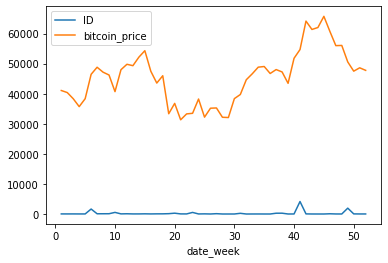

In [311]:
df7.head()
#df7.plot(x="date_week", y=["ID", "bitcoin_price"], kind="line", figsize=(10, 10))

df7.plot()